# Importing libraries to work with

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Loading data files

In [2]:
data_income = pd.read_csv('income(1).csv')
data = data_income.copy()
data

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


# Getting data information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


# Checking for null values

In [4]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

# Getting Descriptive Summary

In [5]:
summary = data.describe()
summary

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


# Getting descriptive information of categorical data

In [6]:
summary_cate = data.describe(include="object", exclude=["int64", "float64"])
summary_cate

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


# Frequency of Each Category

In [7]:
data['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [8]:
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

# checking for unique classes

In [9]:
np.unique(data['JobType'])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [10]:
np.unique(data['occupation'])

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

there data with na_values marked as special character we will change it to NaN while loading data

In [11]:
data = pd.read_csv('income(1).csv', na_values=[" ?"])
data

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [12]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [13]:
missing = data[data.isnull().any(axis=1)]
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [14]:
data2 = data.dropna(axis=0)
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [15]:
correlation = data2.corr()
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [16]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

# Gender Proportion Table

In [17]:
gender = pd.crosstab(index = data2['gender'], columns = 'count', normalize=True)
gender

col_0,count
gender,
Female,0.324315
Male,0.675685


# Gender vs Salary Status

In [18]:
gender_SalStat = pd.crosstab(index = data2['gender'], columns = data2['SalStat'], margins=True, normalize='index')
gender_SalStat

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


# Frequency Distribution of Salary Status

<AxesSubplot:xlabel='SalStat', ylabel='count'>

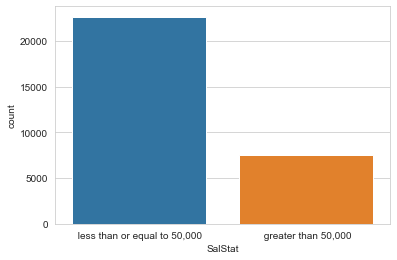

In [19]:
sns.countplot(x = data2['SalStat'])

75% of people have salary <= 50,000
25% of people have salary >50,000

<AxesSubplot:xlabel='age', ylabel='Count'>

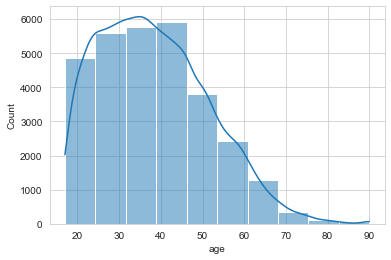

In [20]:
sns.histplot(data2['age'], bins=10, kde=True)

people with age 20-45 are in high frequency

# Box Plot Age vs Salary Status

SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

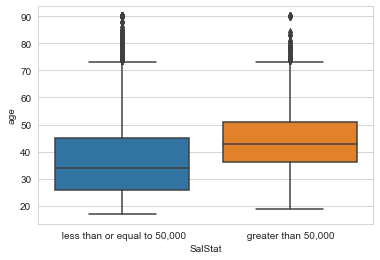

In [21]:
sns.boxplot(x = 'SalStat', y = 'age', data=data2)
data2.groupby('SalStat')['age'].median()

# Job Type vs Salary Status

<AxesSubplot:xlabel='count', ylabel='JobType'>

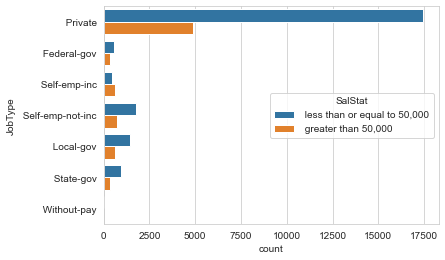

In [22]:
sns.countplot(y = data2['JobType'], hue='SalStat', data=data2)

In [23]:
Job_Sal = pd.crosstab(index=data2['JobType'], columns=data2['SalStat'], normalize='index').round(4)*100
Job_Sal

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.71,61.29
Local-gov,29.46,70.54
Private,21.88,78.12
Self-emp-inc,55.87,44.13
Self-emp-not-inc,28.57,71.43
State-gov,26.90,73.10
Without-pay,0.00,100.00


# Education vs Salary

<AxesSubplot:xlabel='count', ylabel='EdType'>

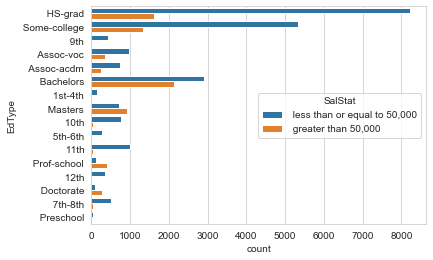

In [24]:
sns.countplot(y = data2['EdType'], hue='SalStat', data=data2)

In [25]:
Edu_Sal = pd.crosstab(index = data2['EdType'], columns = data2['SalStat'], normalize='index').round(4)*100
Edu_Sal

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,7.20,92.80
11th,5.63,94.37
12th,7.69,92.31
1st-4th,3.97,96.03
5th-6th,4.17,95.83
7th-8th,6.28,93.72
9th,5.49,94.51
Assoc-acdm,25.40,74.60
Assoc-voc,26.32,73.68


# Occupation vs Salary Status

<AxesSubplot:xlabel='count', ylabel='occupation'>

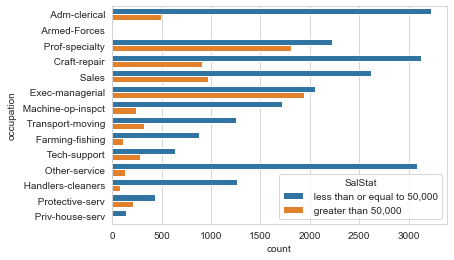

In [26]:
sns.countplot(y = data2['occupation'], hue='SalStat', data = data2)

In [27]:
Ocpn_Sal = pd.crosstab(index = data2['occupation'], columns = data2['SalStat'], normalize='index').round(4)*100
Ocpn_Sal

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.38,86.62
Armed-Forces,11.11,88.89
Craft-repair,22.53,77.47
Exec-managerial,48.52,51.48
Farming-fishing,11.63,88.37
Handlers-cleaners,6.15,93.85
Machine-op-inspct,12.46,87.54
Other-service,4.11,95.89
Priv-house-serv,0.70,99.30


# Capital Gain

<AxesSubplot:xlabel='capitalgain', ylabel='Count'>

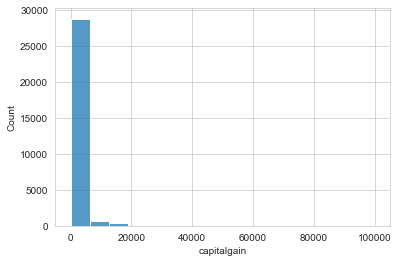

In [28]:
sns.histplot(x = data2['capitalgain'])

92% of the capitol gain is 0

# Capital Loss

<AxesSubplot:xlabel='capitalloss', ylabel='Count'>

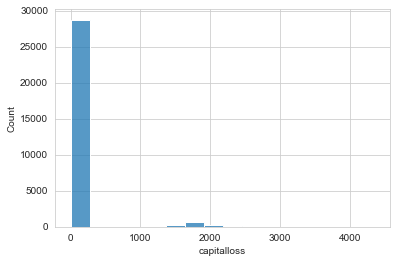

In [29]:
sns.histplot(data2['capitalloss'])

95% of the capitpal loss is zero

# Hours per Week vs Salary Status

<AxesSubplot:xlabel='SalStat', ylabel='hoursperweek'>

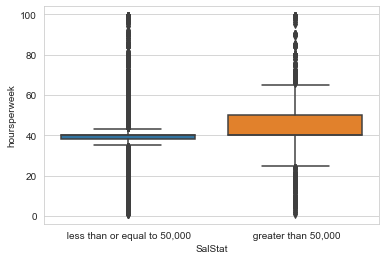

In [30]:
sns.boxplot(x = data2['SalStat'], y = data2['hoursperweek'])

# Reindexing salary status to 0 and 1

In [31]:
data2.loc[data2['SalStat'] == " less than or equal to 50,000", "SalStat"] = 0
data2.loc[data2['SalStat'] == " greater than 50,000", "SalStat"] = 1

In [32]:
data2['SalStat']

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: object

In [33]:
new_data = pd.get_dummies(data2, drop_first=True)
new_data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,age,capitalgain,capitalloss,hoursperweek,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,JobType_ Without-pay,...,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia,SalStat_1
0,45,0,0,28,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,44,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,27,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31974,34,0,0,40,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31975,23,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31976,42,0,0,40,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
columns_list = list(new_data.columns)
columns_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'JobType_ Local-gov',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Prof-specialty

In [35]:
# separating the input names from data
features = list(set(columns_list) - set(['SalStat_1']))
features

['nativecountry_ Cuba',
 'nativecountry_ Poland',
 'occupation_ Prof-specialty',
 'race_ White',
 'nativecountry_ Vietnam',
 'occupation_ Craft-repair',
 'EdType_ 12th',
 'EdType_ Some-college',
 'EdType_ Assoc-voc',
 'capitalloss',
 'nativecountry_ Peru',
 'nativecountry_ Iran',
 'JobType_ Local-gov',
 'nativecountry_ Germany',
 'gender_ Male',
 'occupation_ Handlers-cleaners',
 'occupation_ Exec-managerial',
 'race_ Black',
 'nativecountry_ France',
 'nativecountry_ Philippines',
 'nativecountry_ Ireland',
 'nativecountry_ India',
 'JobType_ Without-pay',
 'EdType_ Bachelors',
 'nativecountry_ Holand-Netherlands',
 'hoursperweek',
 'occupation_ Sales',
 'relationship_ Not-in-family',
 'maritalstatus_ Married-spouse-absent',
 'nativecountry_ Thailand',
 'EdType_ Masters',
 'JobType_ Self-emp-inc',
 'EdType_ 5th-6th',
 'maritalstatus_ Widowed',
 'occupation_ Other-service',
 'nativecountry_ England',
 'occupation_ Armed-Forces',
 'occupation_ Protective-serv',
 'nativecountry_ Columbia

In [36]:
# storing the output values in y
y = new_data['SalStat_1'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [37]:
x = new_data[features].values
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [38]:
# splitting the data into train and test
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3, random_state=0)
test_x.shape

(9049, 94)

In [39]:
# make an instance of model
logistic = LogisticRegression(solver='lbfgs', max_iter=36000)

In [40]:
# fitting values for x and y
logistic.fit(train_x, train_y)
logistic.coef_

array([[ 1.12977260e-02, -6.95291759e-02,  4.35425605e-01,
        -3.72464650e-01, -2.91248909e-01, -1.03703436e-01,
        -4.95688939e-01,  8.26915672e-02,  2.94492598e-01,
         6.47856109e-04, -1.24253535e-01, -4.67420057e-02,
        -7.97655266e-01,  2.76995878e-01,  1.00720083e+00,
        -9.55606447e-01,  6.97259840e-01, -6.51374027e-01,
         4.07068185e-02,  2.59962833e-01, -8.47024535e-03,
        -3.35100625e-01, -1.02888864e-01,  8.40672450e-01,
        -4.21748469e-03,  2.80846796e-02,  1.48588389e-01,
        -8.85809821e-01, -7.46137153e-02, -4.26248397e-02,
         1.31620633e+00, -3.97015217e-01, -9.47244135e-01,
        -2.50662804e-02, -9.44503796e-01,  1.51676814e-01,
        -2.96947107e-02,  4.70262307e-01, -2.54203279e-01,
        -2.50576589e-01,  2.99299822e-01, -2.53518500e-01,
        -3.74275725e-01, -3.25953922e-01,  4.93683447e-01,
        -7.80073997e-01, -2.94548684e-01, -1.28364161e+00,
        -4.24553996e-02, -3.65818734e-01,  1.37691560e-0

In [41]:
# intercept value
logistic.intercept_

array([-3.64726302])

In [42]:
# predicting from test data
prediction = logistic.predict(test_x)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [43]:
confusion_matrix = confusion_matrix(test_y, prediction)
confusion_matrix

array([[6311,  512],
       [ 921, 1305]], dtype=int64)

In [44]:
accuracy_score = accuracy_score(test_y, prediction)
accuracy_score

0.8416399602165985

In [45]:
# misclassified prediction
print('Misclassified Samples %d'% (test_y != prediction).sum())

Misclassified Samples 1433


# Logistic Regression - Removing Insignificant Variables

In [46]:
# reindexing the salary status name to 0, 1
data2.loc[data2['SalStat'] == " less than or equal to 50,000", "SalStat"] = 0
data2.loc[data2['SalStat'] == " greater than 50,000", "SalStat"] = 1
data2['SalStat']

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: object

In [47]:
cols = ['gender', 'nativecountry', 'race', 'JobType']
new_data = data2.drop(cols, axis=1)
new_data

,age,EdType,maritalstatus,occupation,relationship,capitalgain,capitalloss,hoursperweek,SalStat
0,45,HS-grad,Divorced,Adm-clerical,Not-in-family,0,0,28,0
1,24,HS-grad,Never-married,Armed-Forces,Own-child,0,0,40,0
2,44,Some-college,Married-civ-spouse,Prof-specialty,Husband,0,0,40,1
3,27,9th,Never-married,Craft-repair,Other-relative,0,0,40,0
4,20,Some-college,Never-married,Sales,Not-in-family,0,0,35,0
...,...,...,...,...,...,...,...,...,...
31973,34,HS-grad,Never-married,Farming-fishing,Not-in-family,594,0,60,0
31974,34,Some-college,Never-married,Protective-serv,Not-in-family,0,0,40,0
31975,23,Some-college,Married-civ-spouse,Adm-clerical,Husband,0,0,40,0
31976,42,Some-college,Married-civ-spouse,Adm-clerical,Wife,0,0,40,0


In [48]:
new_data = pd.get_dummies(new_data, drop_first=True)
new_data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,age,capitalgain,capitalloss,hoursperweek,EdType_ 11th,EdType_ 12th,EdType_ 1st-4th,EdType_ 5th-6th,EdType_ 7th-8th,EdType_ 9th,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,SalStat_1
0,45,0,0,28,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,44,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,27,0,0,40,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,20,0,0,35,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
31974,34,0,0,40,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
31975,23,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31976,42,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [49]:
# storing the column name
columns_list_1 = list(new_data.columns)
columns_list_1

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Prof-specialty',
 'occupation_ Protective-serv',
 'occupation_ Sales',
 'occupation_ Tech-support',
 'occupation_ Transport-moving',
 'relationship_ Not-in-family

In [50]:
# separating the input names from data
features_1 = list(set(columns_list_1) - set(['SalStat_1']))
features_1

['occupation_ Farming-fishing',
 'occupation_ Prof-specialty',
 'occupation_ Craft-repair',
 'EdType_ 1st-4th',
 'EdType_ 12th',
 'age',
 'relationship_ Wife',
 'EdType_ Some-college',
 'EdType_ Assoc-voc',
 'capitalloss',
 'occupation_ Exec-managerial',
 'occupation_ Handlers-cleaners',
 'EdType_ Preschool',
 'maritalstatus_ Never-married',
 'EdType_ Bachelors',
 'hoursperweek',
 'relationship_ Own-child',
 'capitalgain',
 'maritalstatus_ Separated',
 'EdType_ Prof-school',
 'occupation_ Sales',
 'relationship_ Not-in-family',
 'maritalstatus_ Married-spouse-absent',
 'EdType_ Masters',
 'EdType_ 5th-6th',
 'EdType_ 11th',
 'EdType_ Assoc-acdm',
 'EdType_ 9th',
 'maritalstatus_ Widowed',
 'occupation_ Other-service',
 'maritalstatus_ Married-civ-spouse',
 'occupation_ Armed-Forces',
 'occupation_ Protective-serv',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'maritalstatus_ Married-AF-spouse',
 'relationship_ Other-relative',
 'occupation_ Transport-moving',
 'occupation_ Priv-house-ser

In [51]:
# storing the output values in y
y1 = new_data['SalStat_1'].values
y1

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [52]:
# Storing the values from input features
x1 = new_data[features_1].values
x1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
# splitting the data into train and test
train_x1, test_x1, train_y1, test_y1 = train_test_split(x1,y1,test_size=0.3, random_state=0)

In [54]:
logistic1 = LogisticRegression(solver='lbfgs', max_iter=100000)

In [55]:
# fitting value for x and y
logistic1.fit(train_x1, train_y1)

LogisticRegression(max_iter=100000)

In [56]:
# prediction from test data
prediction1 = logistic1.predict(test_x1)
prediction1

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [60]:
# calculating the accuracy
accuracy_score(test_y1, prediction1)

TypeError: 'numpy.float64' object is not callable

In [61]:
print("Misclassified sample1: %" % (test_y1 != prediction1).sum())

ValueError: incomplete format